In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson

#### dataframe

In [2]:
df = pd.read_csv('time-series-1/AirPassengers.csv')
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#### question 1

##### month dtype from object to datetime

In [4]:
df['Month'] = pd.to_datetime(df['Month'])

##### set month as index

In [5]:
df.set_index('Month', inplace=True)

In [6]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


##### rolling mean

In [7]:
mean_rolling_7 = df.rolling(7).mean()
mean_rolling_7.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,127.857143
1949-08-01,133.000000
1949-09-01,135.571429


##### rolling standard deviation 

In [8]:
std_rolling_7 = df.rolling(7).std()
std_rolling_7

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,89.523607
1960-09-01,75.403044
1960-10-01,67.510140


In [9]:
df.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


##### plot of dataframe

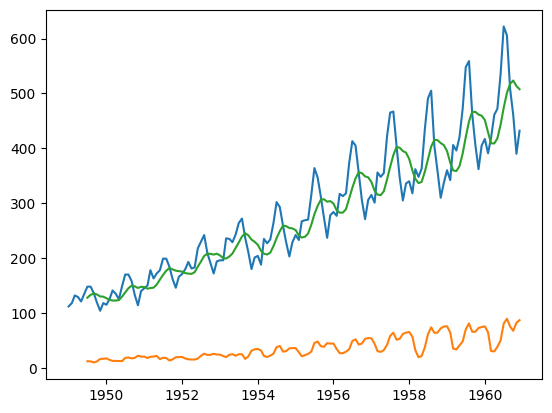

In [10]:
plt.plot(df.index, df['#Passengers']) 
plt.plot(df.index, std_rolling_7)
plt.plot(df.index, mean_rolling_7);

##### this graph shows an upward trend in the mean over time as well as an increasing variance in standard deviation there for it is not stationary

#### question 2

##### differences 

In [11]:
df['diff1'] = df['#Passengers'].diff()

In [12]:
df['diff2'] = df['#Passengers'].diff(2)

In [13]:
df['diff3'] = df['#Passengers'].diff(3)

##### rolling for differences 

In [14]:
df['diff1_mean_rolling7'] = df['diff1'].rolling(7).mean()
df['diff1_std_rolling7'] = df['diff1'].rolling(7).std()

In [15]:
df['diff2_mean_rolling7'] = df['diff2'].rolling(7).mean()
df['diff2_std_rolling7'] = df['diff2'].rolling(7).std()

In [16]:
df['diff3_mean_rolling7'] = df['diff3'].rolling(7).mean()
df['diff3_std_rolling7'] = df['diff3'].rolling(7).std()

##### plotting differences

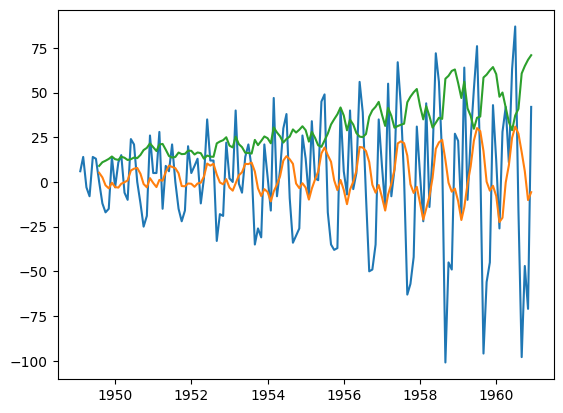

In [17]:
plt.plot(df.index, df['diff1'])
plt.plot(df.index, df['diff1_mean_rolling7'])
plt.plot(df.index, df['diff1_std_rolling7']);

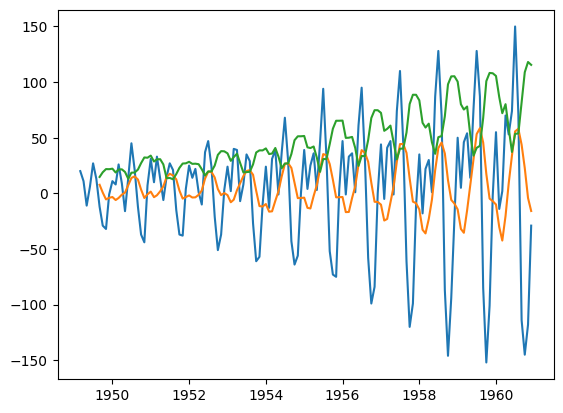

In [18]:
plt.plot(df.index, df['diff2'])
plt.plot(df.index, df['diff2_mean_rolling7'])
plt.plot(df.index, df['diff2_std_rolling7']);

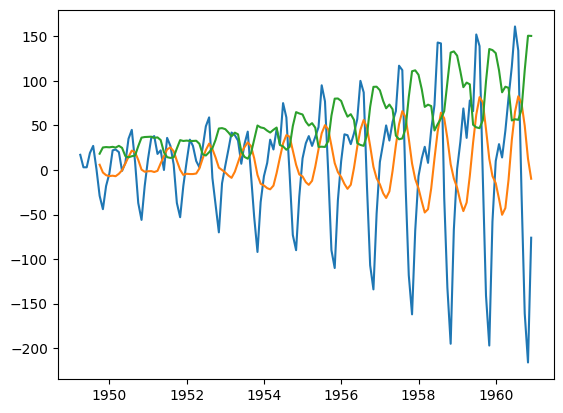

In [19]:
plt.plot(df.index, df['diff3'])
plt.plot(df.index, df['diff3_mean_rolling7'])
plt.plot(df.index, df['diff3_std_rolling7']);

#### question 3

##### log transform 

In [20]:
df['log_#Passengers'] = np.log(df['#Passengers'])

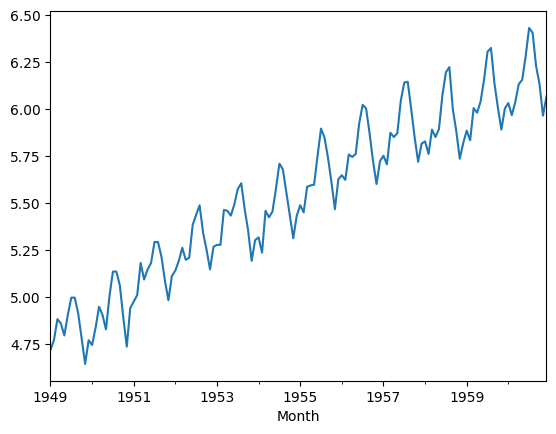

In [21]:
df['log_#Passengers'].plot();

In [22]:
df['log_diff1'] = df['log_#Passengers'].diff()

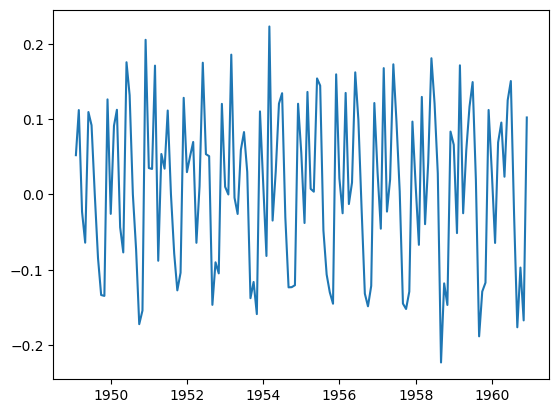

In [23]:
plt.plot(df.index, df['log_diff1']);

In [24]:
df['log_diff2'] = df['log_#Passengers'].diff(2)

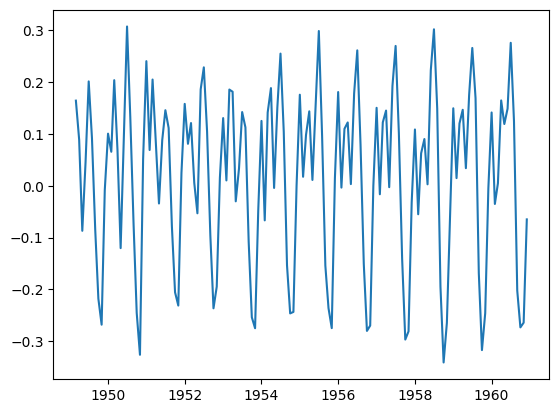

In [25]:
plt.plot(df.index, df['log_diff2']);

In [26]:
df['log_diff3'] = df['log_#Passengers'].diff(3)

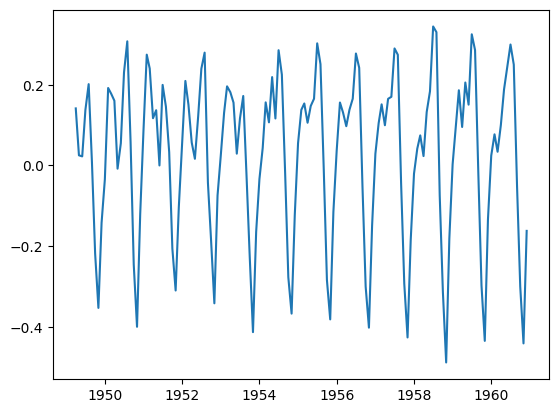

In [27]:
plt.plot(df.index, df['log_diff3']);

#### yeo johnson

In [28]:
yj_passengers, lmbd = yeojohnson(df['#Passengers'])

In [29]:
df['yj_passengers'] = yj_passengers

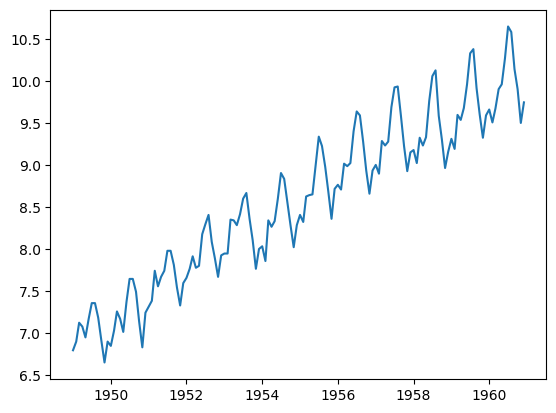

In [30]:
plt.plot(df.index, df['yj_passengers']);

In [31]:
df['yj_diff1'] = df['yj_passengers'].diff()

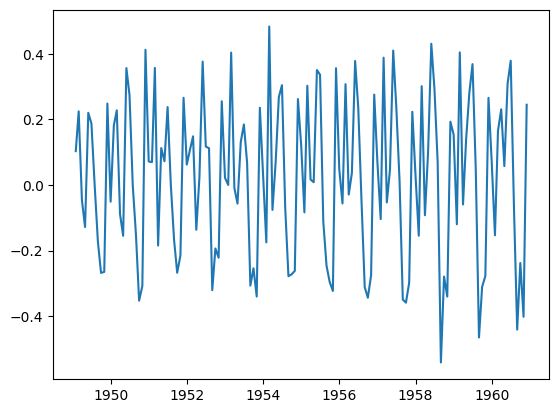

In [32]:
plt.plot(df.index, df['yj_diff1']);

In [33]:
df['yj_diff2'] = df['yj_passengers'].diff(2)

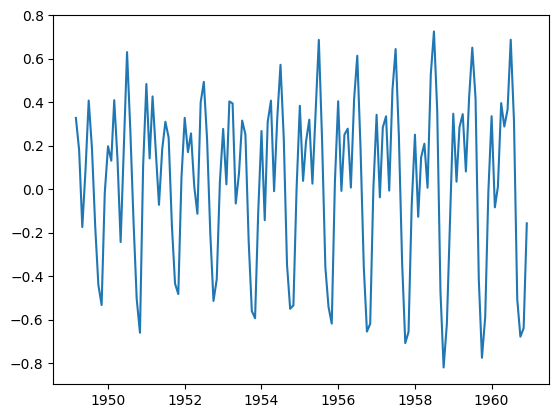

In [34]:
plt.plot(df.index, df['yj_diff2']);

In [35]:
df['yj_diff3'] = df['yj_passengers'].diff(3)

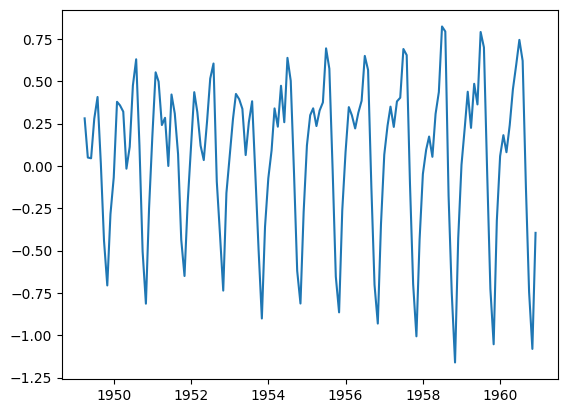

In [36]:
plt.plot(df.index, df['yj_diff3']);

#### question 4

##### origian data adf

In [37]:
log_adf1 = adfuller(df['#Passengers'])
log_adf1

(np.float64(0.815368879206052),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

##### just difference adf 

In [45]:
diff1_adf = adfuller(df['diff1'].dropna())
diff1_adf

(np.float64(-2.8292668241700047),
 np.float64(0.05421329028382478),
 12,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(988.5069317854084))

In [46]:
diff2_adf = adfuller(df['diff2'].dropna())
diff2_adf

(np.float64(-2.9616951355554226),
 np.float64(0.038629757676988535),
 11,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(985.7309222414161))

In [44]:
diff3_adf = adfuller(df['diff3'].dropna())
diff3_adf

(np.float64(-2.88650585654497),
 np.float64(0.04693983572510757),
 10,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(970.9170150837354))

##### log difference adf

In [38]:
log_adf1 = adfuller(df['diff1'].dropna())
log_adf1

(np.float64(-2.8292668241700047),
 np.float64(0.05421329028382478),
 12,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(988.5069317854084))

In [39]:
log_adf2 = adfuller(df['log_diff2'].dropna())
log_adf2

(np.float64(-3.1679073752887383),
 np.float64(0.021919114564039187),
 11,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(-431.93712963284486))

In [42]:
log_adf3 = adfuller(df['log_diff3'].dropna())
log_adf3

(np.float64(-2.728487353194963),
 np.float64(0.06923710234055533),
 12,
 128,
 {'1%': np.float64(-3.4825006939887997),
  '5%': np.float64(-2.884397984161377),
  '10%': np.float64(-2.578960197753906)},
 np.float64(-439.15981985280405))

##### yeo johnson adf

In [47]:
yj_adf1 = adfuller(df['yj_diff1'].dropna())
yj_adf1

(np.float64(-2.872503185120893),
 np.float64(0.048640210532627966),
 14,
 128,
 {'1%': np.float64(-3.4825006939887997),
  '5%': np.float64(-2.884397984161377),
  '10%': np.float64(-2.578960197753906)},
 np.float64(-239.6172043600717))

In [48]:
yj_adf2 = adfuller(df['yj_diff2'].dropna())
yj_adf2

(np.float64(-3.2621502835865717),
 np.float64(0.016657490283272496),
 11,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(-233.16699434472764))

In [51]:
yj_adf3 = adfuller(df['yj_diff3'].dropna())
yj_adf3

(np.float64(-2.8835017988600704),
 np.float64(0.047300425499996704),
 12,
 128,
 {'1%': np.float64(-3.4825006939887997),
  '5%': np.float64(-2.884397984161377),
  '10%': np.float64(-2.578960197753906)},
 np.float64(-241.02209477146766))

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #Passengers          144 non-null    int64  
 1   diff1                143 non-null    float64
 2   diff2                142 non-null    float64
 3   diff3                141 non-null    float64
 4   diff1_mean_rolling7  137 non-null    float64
 5   diff1_std_rolling7   137 non-null    float64
 6   diff2_mean_rolling7  136 non-null    float64
 7   diff2_std_rolling7   136 non-null    float64
 8   diff3_mean_rolling7  135 non-null    float64
 9   diff3_std_rolling7   135 non-null    float64
 10  log_#Passengers      144 non-null    float64
 11  log_diff1            143 non-null    float64
 12  log_diff2            142 non-null    float64
 13  log_diff3            141 non-null    float64
 14  yj_passengers        144 non-null    float64
 15  yj_diff1             

##### data with adf < 0.05

##### dff2: p=0.038629757676988535
##### diff3: p=0.04693983572510757
##### log_diff2: p=0.021919114564039187
##### yj_diff1: p=0.048640210532627966
##### yj_diff2: p=0.016657490283272496
##### yj_diff3: p=0.047300425499996704